# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

TMDb movie data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis

#### Q1. Which genres are most popular from year to year?

#### Q2. What kinds of properties are associated with movies that have high revenues?



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [51]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [52]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [53]:
df.shape

(10866, 21)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [55]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [56]:
sum(df.duplicated())

1

In [57]:
df.id.nunique(), df.original_title.nunique(), df.imdb_id.nunique()

(10865, 10571, 10855)


### Data Cleaning

#### 1. Drop duplicates

In [58]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [59]:
df.shape

(10866, 21)

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.shape

(10865, 21)

#### 2. Columns to drop
Several columns are dropped for the simplicity of analysis. 'imdb_id' is dropped because remained 'id' can do the same job.

In [62]:
df_drop = df.drop(['homepage','imdb_id','overview','budget_adj','revenue_adj','tagline','cast','director','keywords','production_companies','release_date'],axis=1)
df_drop.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


#### 3. Fix data types
Fixing data types is not needed because the data types seem fine to be analyzed.

In [63]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 933.7+ KB


#### 4. Drop nulls in genres

In [64]:
df_drop.dropna(inplace=True)

In [65]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
id                10842 non-null int64
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 931.7+ KB


#### 5. Split genres

The datatype of the column 'genre' is string and they are separated by '|'. To group by 'genres', the column 'genres' is separated to multiple rows.

In [66]:
# Split the string in genres column and turn it into multiple rows of dataframe.
split_df = pd.DataFrame(df_drop.genres.str.split('|').tolist(), index=df_drop.release_year).stack()
split_df = split_df.reset_index([0, 'release_year'])
split_df.columns = ['release_year', 'genre']
split_df

,release_year,genre
0,2015,Action
1,2015,Adventure
2,2015,Science Fiction
3,2015,Thriller
4,2015,Action
5,2015,Adventure
6,2015,Science Fiction
7,2015,Thriller
8,2015,Adventure
9,2015,Science Fiction


The dataframe genre_count shows how many movies for each genre in each year.

In [67]:
# Group the dataframe by release year and genre, and add a new column 'counts'
# which counts the number of movies of each genre in each year.
group = split_df.groupby(['release_year','genre'])
genre_count = group.size().reset_index(name='counts')
genre_count

,release_year,genre,counts
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13
5,1960,Family,3
6,1960,Fantasy,2
7,1960,Foreign,1
8,1960,History,5
9,1960,Horror,7


<a id='eda'></a>
## Exploratory Data Analysis

### Q1. Which genres are most popular from year to year?

In [68]:
# List every genres in this dataset.
unique_genre = genre_count.genre.unique()
unique_genre

array(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western', 'Animation',
       'Mystery', 'TV Movie', 'Documentary'], dtype=object)

I want to know the ratio of each genre to the total number of movies by year.

In [69]:
# Count the number of all movies in each year
total_movie = df_drop.groupby('release_year')['id'].count()
total_movie

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    136
1990    132
1991    133
1992    133
1993    178
1994    184
1995    174
1996    203
1997    192
1998    210
1999    224
2000    226
2001    241
2002    266
2003    281
2004    307
2005    363
2006    408
2007    438
2008    495
2009    531
2010    487
2011    540
2012    584
2013    656
2014    699
2015    627
Name: id, dtype: int64

Divide the count by genre by the total number of films in the year.

In [70]:
# Add a new column 'counts_per_total' which is the number of movies of each genre
# divided by the total number of movie for the corresponding year
# to know the proportion of them.
for i, row in genre_count.iterrows():
    total = total_movie[row['release_year']]
    genre_count.loc[i, 'counts_per_total'] = row['counts'] / total
genre_count

,release_year,genre,counts,counts_per_total
0,1960,Action,8,0.250000
1,1960,Adventure,5,0.156250
2,1960,Comedy,8,0.250000
3,1960,Crime,2,0.062500
4,1960,Drama,13,0.406250
5,1960,Family,3,0.093750
6,1960,Fantasy,2,0.062500
7,1960,Foreign,1,0.031250
8,1960,History,5,0.156250
9,1960,Horror,7,0.218750


Plot with a moving average to get rid of fluctuations and better see the trend.

In [71]:
# A function to draw plots for each genre, which contains moving average of counts per total along years.
def genre_plot(genre):
    a = genre_count[genre_count['genre']==genre]
    a['moving_average'] = a.counts_per_total.rolling(10).mean()
    a.plot(x='release_year',y='moving_average')
    plt.title(genre)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


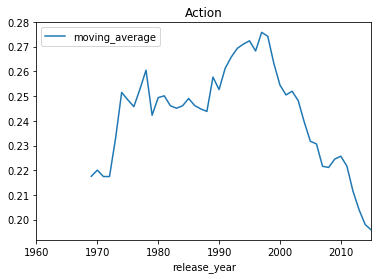

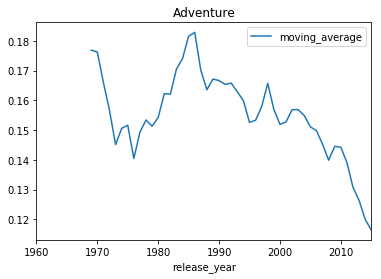

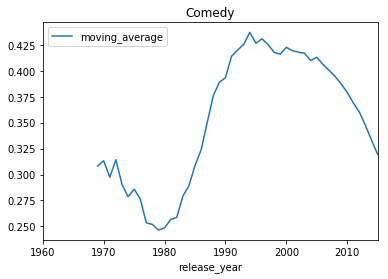

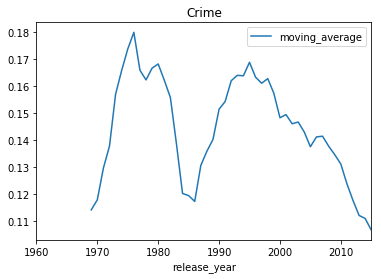

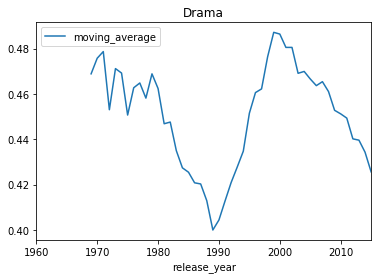

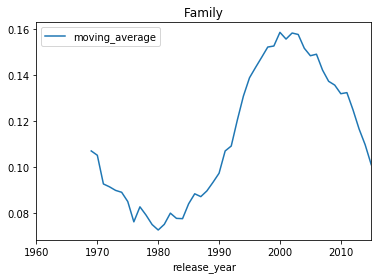

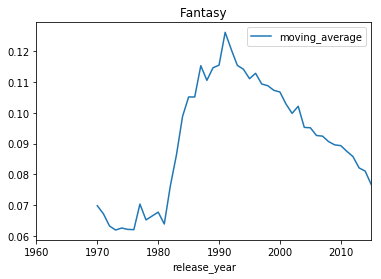

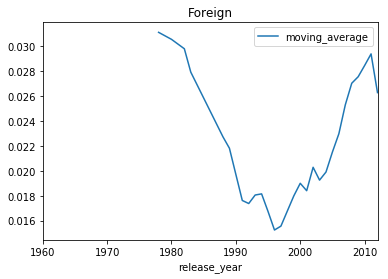

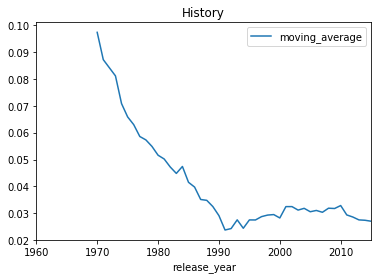

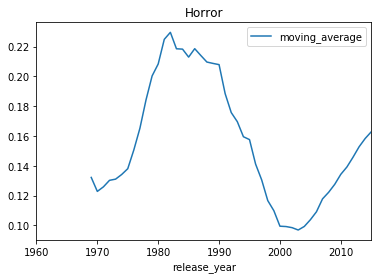

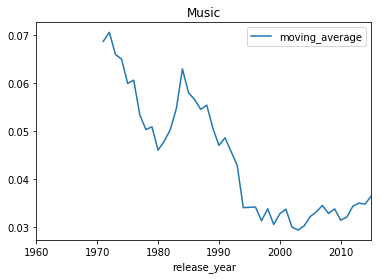

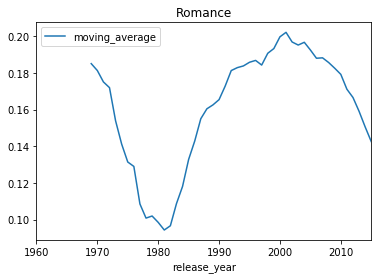

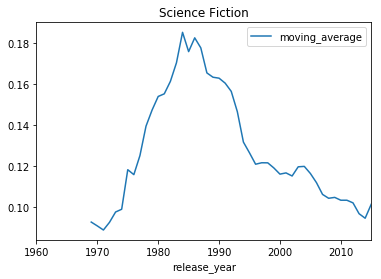

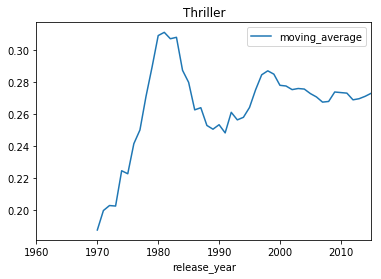

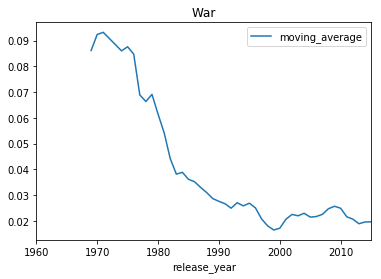

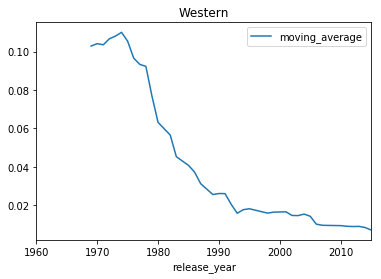

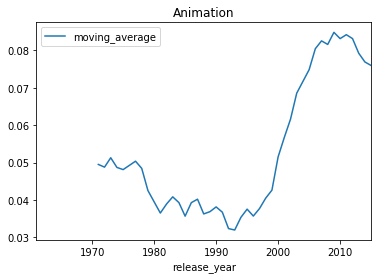

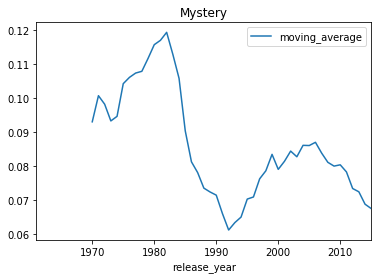

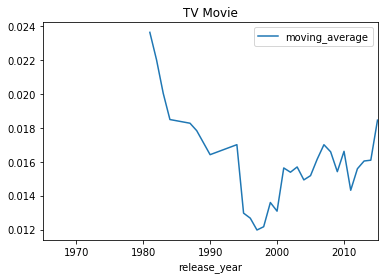

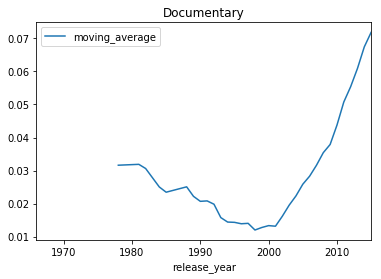

In [72]:
for genre in unique_genre:
    genre_plot(genre)

The analysis was based on the number of movies released by era. By genre, the graphs show very different aspects. Comedy and fantasy show a surge in the 1980s. History, music, western and war genres have steadily declined over time. Science fiction accounted for the largest proportion in the 1980s. The Thriller genre depicts an increasing trend over time. The animation and documentary genres have exploded since 2000.

### Q2. What kinds of properties are associated with movies that have high revenues?

In [73]:
df_drop.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


To see the relationship between revenue and other variables, I drew individual scatter plots and trend lines.

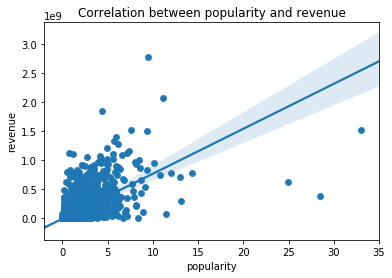

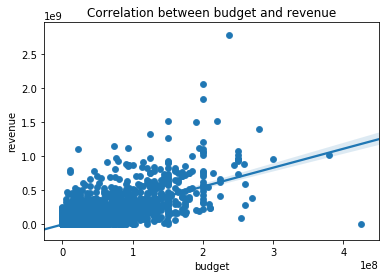

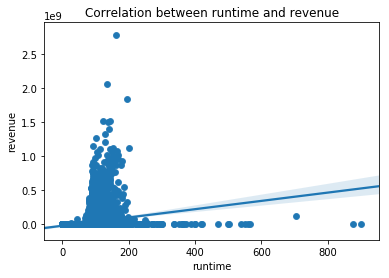

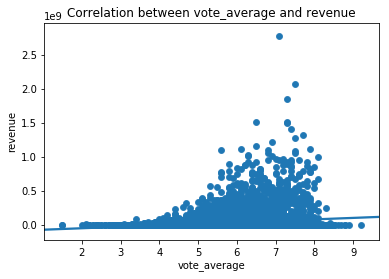

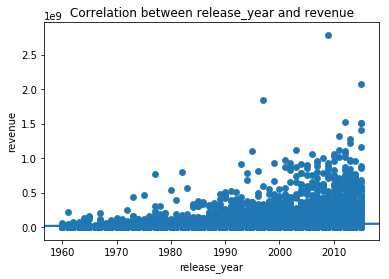

In [74]:
# Draw scatter plots for the properties against revenue and also a trend line.
columns = ['popularity','budget','runtime','vote_average','release_year']
for column in columns:
    df_drop.plot(x=column,y='revenue',kind='scatter')
    sns.regplot(x=column,y='revenue',data=df_drop)
    plt.title('Correlation between {} and revenue'.format(column))

Text(0,0.5,'Number of movies')

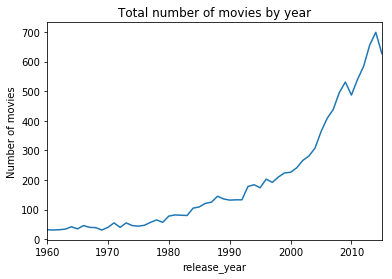

In [75]:
total_movie.plot()
plt.title('Total number of movies by year')
plt.ylabel('Number of movies')

<a id='conclusions'></a>
## Conclusions

As can be seen from the graph above, it can be seen that the total number of movies has increased significantly over the years. And in terms of genre, it was possible to observe an increasing trend in animation and documentary, and a decreasing trend in history, music, war, and western. The variables that had a positive correlation with revenue were popularity and budget.

### Limitations

I analyzed the popularity of movies by genre by the number of movies, but if I analyzed them by popularity or revenue, I could get a different aspect. In the correlation analysis with revenue, there were not many types of properties that could be tried, and it can be seen that it is not independent of revenue and popularity.

### References
1. https://sureshssarda.medium.com/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e
2. https://wendys.tistory.com/178
3. https://seaborn.pydata.org/generated/seaborn.regplot.html


## Submitting your Project 

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0